In [0]:
import re
import nltk
from nltk.corpus import reuters
import numpy as np
import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.preprocessing.label import MultiLabelBinarizer    
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings('ignore')

In [0]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
stopWords = stopwords.words('english')
charfilter = re.compile('[a-zA-Z]+')

In [0]:
def simple_tokenizer(text):
    words = word_tokenize(text)
    words = map(lambda word: word.lower(), words)
    words = [word for word in words if word not in stopWords]
    tokens = (list(map(lambda token: PorterStemmer().stem(token), words)))
    ntokens = list(filter(lambda token : charfilter.match(token),tokens))
    return ntokens

In [0]:
vec = TfidfVectorizer(tokenizer = simple_tokenizer, max_features = 1000, norm = 'l2')

In [0]:
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
 ]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())
print(X)


['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
  (0, 1)	0.46979138557992045
  (0, 2)	0.5802858236844359
  (0, 6)	0.38408524091481483
  (0, 3)	0.38408524091481483
  (0, 8)	0.38408524091481483
  (1, 5)	0.5386476208856763
  (1, 1)	0.6876235979836938
  (1, 6)	0.281088674033753
  (1, 3)	0.281088674033753
  (1, 8)	0.281088674033753
  (2, 4)	0.511848512707169
  (2, 7)	0.511848512707169
  (2, 0)	0.511848512707169
  (2, 6)	0.267103787642168
  (2, 3)	0.267103787642168
  (2, 8)	0.267103787642168
  (3, 1)	0.46979138557992045
  (3, 2)	0.5802858236844359
  (3, 6)	0.38408524091481483
  (3, 3)	0.38408524091481483
  (3, 8)	0.38408524091481483


In [0]:
nltk.download('reuters')

[nltk_data] Downloading package reuters to /root/nltk_data...


True

In [0]:
test_data = []
test_labels = []
train_data = []
train_labels = []
for file in reuters.fileids():
    if file.startswith('training/'):
        train_data.append(reuters.raw(file))
        train_labels.append(reuters.categories(file))
    elif file.startswith('test/'):
        test_data.append(reuters.raw(file))
        test_labels.append(reuters.categories(file))
    else:
        print('error')

In [0]:
test_data[0]

'ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RIFT\n  Mounting trade friction between the\n  U.S. And Japan has raised fears among many of Asia\'s exporting\n  nations that the row could inflict far-reaching economic\n  damage, businessmen and officials said.\n      They told Reuter correspondents in Asian capitals a U.S.\n  Move against Japan might boost protectionist sentiment in the\n  U.S. And lead to curbs on American imports of their products.\n      But some exporters said that while the conflict would hurt\n  them in the long-run, in the short-term Tokyo\'s loss might be\n  their gain.\n      The U.S. Has said it will impose 300 mln dlrs of tariffs on\n  imports of Japanese electronics goods on April 17, in\n  retaliation for Japan\'s alleged failure to stick to a pact not\n  to sell semiconductors on world markets at below cost.\n      Unofficial Japanese estimates put the impact of the tariffs\n  at 10 billion dlrs and spokesmen for major electronics firms\n  said they would v

In [0]:
test_labels[1]

['grain']

In [0]:
labels = set()
for i in test_labels:
  for j in i:
    labels.add(j)

In [0]:
print(labels)

{'yen', 'wheat', 'wpi', 'rapeseed', 'grain', 'sun-oil', 'lumber', 'rice', 'cpi', 'strategic-metal', 'sorghum', 'coconut', 'alum', 'potato', 'palm-oil', 'tea', 'gold', 'housing', 'rand', 'castor-oil', 'fuel', 'rape-oil', 'palladium', 'zinc', 'oat', 'lei', 'soy-meal', 'jobs', 'platinum', 'nat-gas', 'oilseed', 'nkr', 'ship', 'silver', 'corn', 'sunseed', 'copra-cake', 'hog', 'money-supply', 'soy-oil', 'lead', 'sun-meal', 'rye', 'orange', 'heat', 'coconut-oil', 'crude', 'propane', 'cpu', 'naphtha', 'lin-oil', 'money-fx', 'livestock', 'interest', 'dlr', 'sugar', 'soybean', 'instal-debt', 'barley', 'income', 'groundnut-oil', 'retail', 'cocoa', 'groundnut', 'rubber', 'trade', 'iron-steel', 'acq', 'bop', 'pet-chem', 'dmk', 'dfl', 'carcass', 'reserves', 'gas', 'coffee', 'jet', 'palmkernel', 'cotton', 'nzdlr', 'gnp', 'cotton-oil', 'earn', 'tin', 'copper', 'ipi', 'meal-feed', 'veg-oil', 'l-cattle', 'nickel'}


In [0]:
len(labels)

90

In [0]:
docs_pca_train = []
docs_pca_labels = []
for i in range(len(train_labels)):
    if any(item in train_labels[i] for item in labels):
        docs_pca_train.append(train_data[i])
        docs_pca_labels.append(train_labels[i])

In [0]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
pca_vec = vec.fit_transform(docs_pca_train)

In [0]:
from sklearn.decomposition import PCA
pca = PCA(90)
pca.fit(pca_vec.toarray())
docs_pca = pca.transform(pca_vec.toarray())

In [0]:
labelBinarizer = MultiLabelBinarizer()
data_labels_binary = labelBinarizer.fit_transform(docs_pca_labels)
data_labels_encode = data_labels_binary.argmax(axis = 1)
data_labels_encode = data_labels_encode.astype(int)

In [0]:
import matplotlib.pyplot as plt

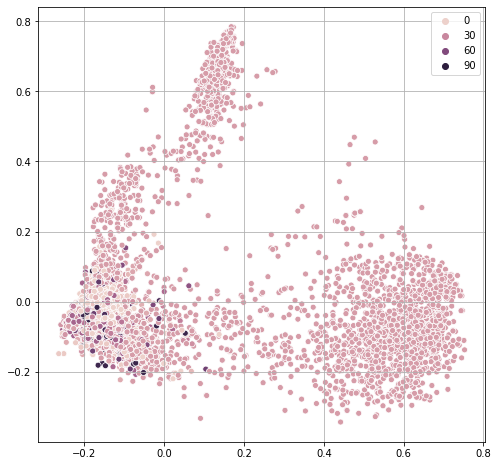

In [0]:
import seaborn as sns
plt.figure(figsize = (8, 8 ))
plt.grid()
sns.scatterplot(docs_pca[:, 0], docs_pca[:, 1], hue =data_labels_encode)
plt.show()

In [0]:
from sklearn.cluster import KMeans
k_means = KMeans(90, max_iter =100)
clusters = k_means.fit_predict(pca_vec)

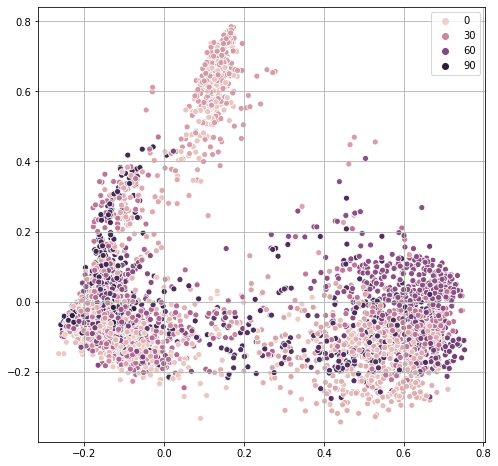

In [0]:
plt.figure(figsize = (8,8))
plt.grid()
sns.scatterplot(docs_pca[:, 0], docs_pca[:, 1], hue = clusters)
plt.show()
